# Ablation regularization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import corc.graph_metrics.neb
import corc.utils
import corc.our_datasets
import os
import pickle
import matplotlib.pyplot as plt

cache_path="../cache"

In [7]:
import numpy as np
import tqdm 

# Create lists to store the ARI values for each dataset

# Loop through each dataset
plotting_datasets = [
    "densired8",
    "densired16",
    "densired32",
    "densired_soft_8",
    "densired_soft_16",
    "densired_soft_32",
    "mnist8",
    "mnist16",
    "mnist32",
]
ari_values_min = dict()
ari_values_mean = dict()
ari_values_max = dict()
for dataset in tqdm.tqdm(plotting_datasets):
    filename = os.path.join(
        cache_path, "ablations", f"tmms_regularization_{dataset}.pickle"
    )
    if not os.path.exists(filename):
        continue
    with open(filename, "rb") as f:
        tmm_levels = pickle.load(f)

    X,y,_ = corc.utils.load_dataset(dataset)
    ari_values_min[dataset] = dict()
    ari_values_mean[dataset] = dict()
    ari_values_max[dataset] = dict()
    for level in tmm_levels.keys():
        ari_values_dataset = list()
        for tmm in tmm_levels[level]:
            ari_values_dataset.append(tmm.get_ari(X,y))
        ari_values_min[dataset][level] = np.min(ari_values_dataset)
        ari_values_mean[dataset][level] = np.mean(ari_values_dataset)
        ari_values_max[dataset][level] = np.max(ari_values_dataset)


100%|██████████| 9/9 [00:08<00:00,  1.10it/s]


In [8]:
def plot_ari_values(ari_values, save=False):
    # Create the plot
    plt.rcParams.update({'font.size': 12})
    fig, axs = plt.subplots(1, figsize=(10, 4))

    # Plot the absolute ARI values
    for dataset in corc.our_datasets.CORE_HD_DATASETS:
        if dataset in ari_values.keys():
            label = corc.our_datasets.dataset_displaynames[dataset].replace("\n", " ")
            axs.plot(list(ari_values[dataset].keys()), list(ari_values[dataset].values()), label=label, marker="o")

    axs.set_xticks(sorted(list(ari_values[corc.our_datasets.CORE_HD_DATASETS[0]].keys())))
    axs.set_xlabel('TMM Regularization Strength')
    axs.set_ylabel('ARI')
    axs.set_xscale('log')
    axs.legend(fontsize=12, ncol=3, loc='upper center', bbox_to_anchor=(0.5, -0.2))
    if save:
        plt.savefig(os.path.join(cache_path, "../figures", "ablation_regularization.pdf"), bbox_inches='tight')
    plt.show()

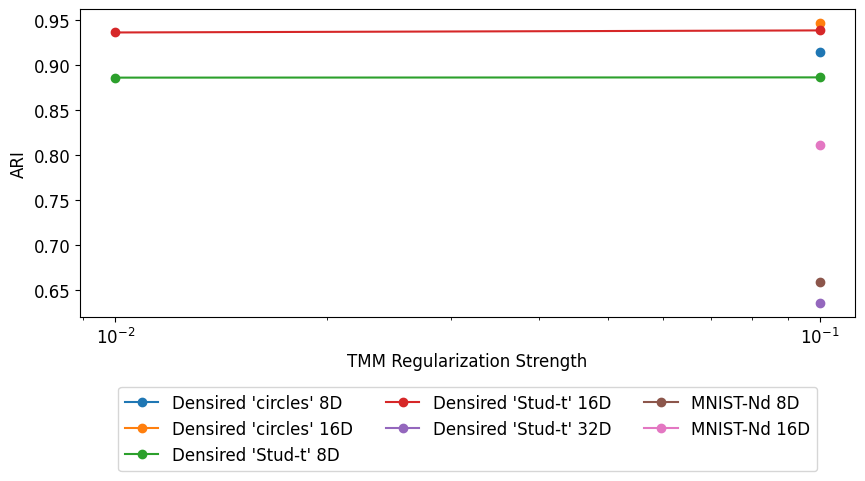

In [9]:
plot_ari_values(ari_values_max, save=True)

In [ ]:
plot_ari_values(ari_values_min)

In [ ]:
plot_ari_values(ari_values_mean)